In [20]:
# Written by Herman van Haagen, https://www.linkedin.com/in/hermanvanhaagen/

# Regularization

In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [22]:
np.random.seed(42) # Set this to a number. Every run will use the same randomization

In [23]:
lamda = 0.001 # This is de regularization parameter
# set it to 0.001 so see how regularization works. 

### Functions

In [24]:
# The activation function for the hidden layers
def ReLU(x):
    return np.maximum(0,x)

In [25]:
# The derivatie of the ReLU
def ReLU_prime(x):
    return (x>0)*1

In [26]:
def softmax(X):
    return np.exp(X)/np.sum(np.exp(X))

In [27]:
# We are using a softmax activation function as the output. 
# For that we need to label our labels as onehot. 
def onehot(label):
    if label==1.0:
        x = np.array([0,1])
        return x[:,np.newaxis]
    if label==0.0:
        x = np.array([1,0])
        return x[:,np.newaxis]

### Create linear data. It is sparse so ovefitting happens easily

In [28]:
N = 25 # choose a view samples to see the overfitting.
# With higher N there is no overfitting

x1 = np.append(np.random.normal(-1,1,N),np.random.normal(1,1,N))
x2 = np.append(np.random.normal(-1,1,N),np.random.normal(1,1,N))

# Create labels for the two classes
labels = np.append(np.ones(N),np.zeros(N))

# Shuffle de labels en data. This is needed for proper training
sample = list(range(0, 2*N))
np.random.shuffle(sample)
x1 = x1[sample]
x2 = x2[sample]
labels = labels[sample]

In [29]:
# Normalize the dataset using the mi/nmax normalizer
x1 = x1-np.min(x1)
x2 = x2-np.min(x2)
x1 = x1/np.max(x1)
x2 = x2/np.max(x2)

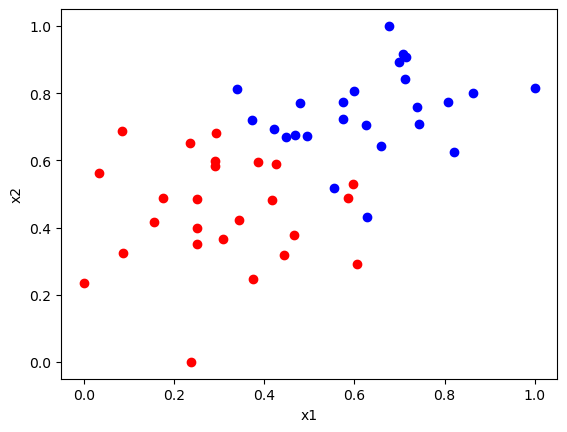

In [30]:
# Plot the dummy data. You can clearly see the data
# is linear seperatable
indpos = np.where(labels==1)
indneg = np.where(labels==0)
plt.scatter(x1[indpos],x2[indpos],color="red")
plt.scatter(x1[indneg],x2[indneg],color="blue")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### Initialize weights and training parameters

In [31]:
epochs = 1000
lr = 0.01

In [32]:
N = 512
W0 = np.random.rand(N,2)
W1 = np.random.rand(2,N)
B0 = np.random.rand(N,1)
B1 = np.random.rand(2,1)

W0_m = np.array(W0, copy=True)
W1_m = np.array(W1, copy=True)
B0_m = np.array(B0, copy=True)
B1_m = np.array(B1, copy=True)

In [33]:
accuracy = []

momentumW0 = 0
momentumW1 = 0
momentumB0 = 0
momentumB1 = 0

for k in range(epochs):
            
    correct = 0
    fout = 0
    for m in range(len(x1)):
        
        # Select one instance of the data (stochastic gradient descent)
        X0 = np.array([x1[m],x2[m]])
        X0 = X0[ :,np.newaxis]
        label = labels[m]
        
        #The forward pass
        Y0 = np.matmul(W0, X0)+B0
        X1 = ReLU(Y0)
        Y1 = np.matmul(W1, X1)+B1
        X2 = ReLU(Y1)
        
        out = softmax(X2)
        
        prediction = float(out[0][0])>0.5
        #print(prediction)
        if label==prediction:
            correct = correct+1
        else:
            fout = fout+1
    
        # backpropagation
        error = out-onehot(label)
        
        d1  = error*ReLU_prime(Y1)
        dW1 = np.matmul(d1,np.transpose(X1)) + lamda*(W1) #  labda*(W1) = regularization
        dB1 = d1 + lamda*(B1) # + regularization
    
        d0  = np.matmul(np.transpose(W1),d1)*ReLU_prime(Y0)
        dW0 = np.matmul(d0,np.transpose(X0)) + lamda*(W0) # + regularization
        dB0 = d0 + lamda*(B0) # + regularization

        momentumW0 = lr*dW0 + 0.9*momentumW0
        momentumW1 = lr*dW1 + 0.9*momentumW1
        momentumB0 = lr*dB0 + 0.9*momentumB0
        momentumB1 = lr*dB1 + 0.9*momentumB1

        #update rule
        W0 = W0-momentumW0
        W1 = W1-momentumW1
        B0 = B0-momentumB0
        B1 = B1-momentumB1
        
    print('epoch: '+str(k)+'\t'+str(correct)+'\t'+str(fout))
    accuracy += [(fout/len(x1))]

epoch: 0	23	27
epoch: 1	19	31
epoch: 2	10	40
epoch: 3	11	39
epoch: 4	10	40
epoch: 5	10	40
epoch: 6	5	45
epoch: 7	6	44
epoch: 8	5	45
epoch: 9	8	42
epoch: 10	8	42
epoch: 11	8	42
epoch: 12	8	42
epoch: 13	7	43
epoch: 14	7	43
epoch: 15	5	45
epoch: 16	5	45
epoch: 17	5	45
epoch: 18	4	46
epoch: 19	4	46
epoch: 20	4	46
epoch: 21	4	46
epoch: 22	4	46
epoch: 23	4	46
epoch: 24	4	46
epoch: 25	4	46
epoch: 26	4	46
epoch: 27	4	46
epoch: 28	4	46
epoch: 29	4	46
epoch: 30	4	46
epoch: 31	4	46
epoch: 32	4	46
epoch: 33	4	46
epoch: 34	4	46
epoch: 35	4	46
epoch: 36	4	46
epoch: 37	4	46
epoch: 38	4	46
epoch: 39	4	46
epoch: 40	4	46
epoch: 41	4	46
epoch: 42	4	46
epoch: 43	4	46
epoch: 44	4	46
epoch: 45	4	46
epoch: 46	4	46
epoch: 47	4	46
epoch: 48	4	46
epoch: 49	4	46
epoch: 50	4	46
epoch: 51	4	46
epoch: 52	4	46
epoch: 53	4	46
epoch: 54	4	46
epoch: 55	4	46
epoch: 56	4	46
epoch: 57	4	46
epoch: 58	4	46
epoch: 59	4	46
epoch: 60	4	46
epoch: 61	4	46
epoch: 62	4	46
epoch: 63	4	46
epoch: 64	4	46
epoch: 65	4	46
epoch: 66	4	46

epoch: 545	4	46
epoch: 546	4	46
epoch: 547	4	46
epoch: 548	4	46
epoch: 549	4	46
epoch: 550	4	46
epoch: 551	4	46
epoch: 552	4	46
epoch: 553	4	46
epoch: 554	4	46
epoch: 555	4	46
epoch: 556	4	46
epoch: 557	4	46
epoch: 558	4	46
epoch: 559	4	46
epoch: 560	4	46
epoch: 561	4	46
epoch: 562	4	46
epoch: 563	4	46
epoch: 564	4	46
epoch: 565	4	46
epoch: 566	4	46
epoch: 567	4	46
epoch: 568	4	46
epoch: 569	4	46
epoch: 570	4	46
epoch: 571	4	46
epoch: 572	4	46
epoch: 573	4	46
epoch: 574	4	46
epoch: 575	4	46
epoch: 576	4	46
epoch: 577	4	46
epoch: 578	4	46
epoch: 579	4	46
epoch: 580	4	46
epoch: 581	4	46
epoch: 582	4	46
epoch: 583	4	46
epoch: 584	4	46
epoch: 585	4	46
epoch: 586	4	46
epoch: 587	4	46
epoch: 588	4	46
epoch: 589	4	46
epoch: 590	4	46
epoch: 591	4	46
epoch: 592	4	46
epoch: 593	4	46
epoch: 594	4	46
epoch: 595	4	46
epoch: 596	4	46
epoch: 597	4	46
epoch: 598	4	46
epoch: 599	4	46
epoch: 600	4	46
epoch: 601	4	46
epoch: 602	4	46
epoch: 603	4	46
epoch: 604	4	46
epoch: 605	4	46
epoch: 606	4	46
epoch: 6

### Visualize the trained results. Without the regularization you should see the overfitting happening

In [34]:
# Fill a grid of 1 by 1 with random number
x = np.random.rand(10000)
y = np.random.rand(10000)

In [35]:
# Classify these numbers with the trained classifier
# This will show how the discriminant lines look like. 
pred = []
for k in range(len(x)):
        
    X0 = np.array([x[k],y[k]])
    X0 = X0[ :,np.newaxis]
        
    #The forward pass
    Y0 = np.matmul(W0, X0)+B0
    X1 = ReLU(Y0)
    Y1 = np.matmul(W1, X1)+B1
    X2 = ReLU(Y1)
    out = np.exp(X2)/np.sum(np.exp(X2))
            
    prediction = float(out[0][0])>0.5
    if label!=prediction:
        pred += [k]

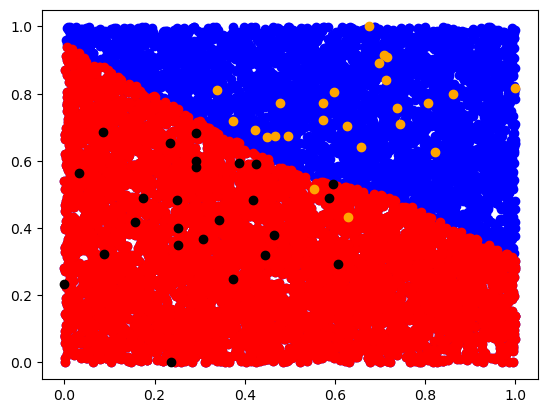

In [36]:
# Plot the discriminant lines (in red and blue) with the original dataset
plt.scatter(x,y,color='blue')
plt.scatter(x[pred],y[pred],color='red')

neg = np.where(labels==0)[0]
pos = np.where(labels==1)[0]
plt.scatter(x1[neg],x2[neg],color='orange')
plt.scatter(x1[pos],x2[pos],color='black')
plt.show()

### Look at the weights after training. Without regularization those can be higher compared to the regularization

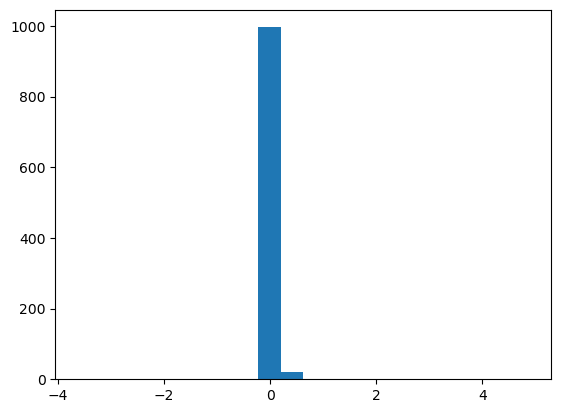

In [37]:
plt.hist(W0.flatten(),bins=20)
plt.show()

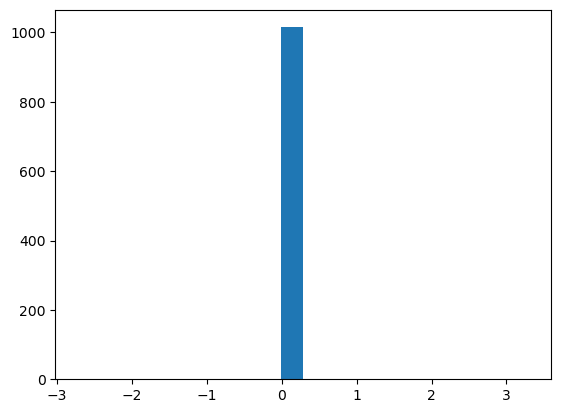

In [38]:
plt.hist(W1.flatten(),bins=20)
plt.show()